In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [11]:
#importLibary
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

In [12]:
data_s=pd.ExcelFile('https://openei.org/doe-opendata/dataset/f6c9151f-3488-452e-a898-f4f607a025e8/resource/c19dba77-47f4-47f3-b2a0-e20c3297f8b3/download/industrialindicators.xls')
worksheets=data_s.sheet_names
print('All the worksheets', worksheets)

All the worksheets ['Directory', 'General_inputs', 'Total_Industrial ', 'Manufacturing', 'NonManufacturing ', 'Charts (www)', 'Manufacturing_Energy_Data', 'Fossil_1987forward', 'Aggregate_Energy_Data', 'AER04_Table2.1', 'GDP_Data', 'Conversion_factors', 'BEA_Output_Data', 'Mfg Gross Output', 'Mfg Value Added', 'GPERS2000', 'Gross Output over VA', 'NAICS Sector VA over Manufac VA', 'Mfg Shipments (6)', 'Electric Energy (6)', 'Fuel Energy (6)', 'Pulp&Paper']


In [19]:
#read the manufacturing data
data_energy=data_s.parse(6)
data_energy.head(20)

,Unnamed: 0,The information columns C through X in this worksheet are based upon an extensive analysis of data from,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,Manufacturing Energy Consumption Surveys (MECS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Survey of Manufactures. The work to reconcile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,systems from the SIC to the NAICS is still ong...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,more disaggregated analysis are made to allevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,adjustments are shown in columns AA through AX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Not Used,NaN,Not Used,NaN,Not Used,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Electricty,NAICS 311,NAICS 312,NAICS 313,NAICS 314,NAICS 315,NAICS 316,NAICS 321,NAICS 322,...,NAICS 327,NAICS 331,NAICS 332,NAICS 333,NAICS 334,NAICS 335,NAICS 336,NAICS 337,NAICS 339,Total
8,NaN,1977,130.009,23.8617,61.4594,32.9,23,5,58.7431,273.41,...,112.365,441.733,101.455,70.3271,56.713,40.8302,120.518,15.4504,15.1519,2109.66
9,NaN,1978,130.657,24.325,60.1518,32.2,23,5,60.8792,280.605,...,118.725,466.364,101.455,74.6753,59.17,42.7493,122.792,16.554,15.1519,2147.6


In [20]:
#data shape
data_energy.shape

(73, 50)

In [47]:
#to make this useful for electrity analysiElectricty
Electricty=data_energy.drop (data_energy.index[[0,1,2,3,4,5,6,7]])
i=range(28,65)
Electricty=Electricty.drop(Electricty.index[[i]])
Electricty

,Unnamed: 0,The information columns C through X in this worksheet are based upon an extensive analysis of data from,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
8,NaN,1977,130.009,23.8617,61.4594,32.9,23,5,58.7431,273.41,...,112.365,441.733,101.455,70.3271,56.713,40.8302,120.518,15.4504,15.1519,2109.66
9,NaN,1978,130.657,24.325,60.1518,32.2,23,5,60.8792,280.605,...,118.725,466.364,101.455,74.6753,59.17,42.7493,122.792,16.554,15.1519,2147.6
10,NaN,1979,127.634,25.2517,58.8441,31.5,20,4,58.7431,284.202,...,119.785,487.712,101.455,75.4024,61.8441,44.6683,123.929,15.4504,15.0595,2165.85
11,NaN,1980,131.629,26.7575,57.5365,30.8,21,5,53.4028,305.788,...,110.245,459.796,96.9455,75.4024,61.8441,44.6683,115.97,14.3468,14.5457,2089.71
12,NaN,1981,132.061,27.4525,56.8826,30.45,21,5,53.4028,320.178,...,109.185,464.722,98.0729,78.3036,63.9345,46.1098,117.107,15.4504,14.9618,2117.19
13,NaN,1982,146.099,30.9275,53.6135,28.7,22,4,53.4028,309.385,...,100.704,344.847,98.0729,75.4024,65.9842,47.5513,111.422,14.3468,15.3832,1971.49
14,NaN,1983,139.404,30.0008,58.8441,31.5,21,4,54.4708,318.379,...,103.884,337.457,98.0729,72.5012,72.2962,52.3533,118.244,16.554,15.7993,1998.98
15,NaN,1984,144.479,30.3483,59.4979,31.85,25,4,60.8792,329.171,...,109.185,402.321,117.239,75.4024,74.631,53.7948,129.614,17.6576,17.1506,2179.33
16,NaN,1985,146.5,43.6,69.3,19.1,13.9,2.8,64.5,318.5,...,113.955,417.347,110.486,73.0029,99.5524,51.2331,135.753,16.6087,22.1961,2155.8
17,NaN,1986,152.6,37.2,72.9,20,16.4,3,68.4,325.7,...,117.559,425.804,115.897,76.9294,92.1029,51.7541,141.779,18.2477,24.0458,2207.22


In [48]:
#drop colume
Electricty=Electricty.drop(Electricty.columns[0],axis=1)
Electricty


,The information columns C through X in this worksheet are based upon an extensive analysis of data from,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
8,1977,130.009,23.8617,61.4594,32.9,23,5,58.7431,273.41,36.2824,...,112.365,441.733,101.455,70.3271,56.713,40.8302,120.518,15.4504,15.1519,2109.66
9,1978,130.657,24.325,60.1518,32.2,23,5,60.8792,280.605,35.2745,...,118.725,466.364,101.455,74.6753,59.17,42.7493,122.792,16.554,15.1519,2147.6
10,1979,127.634,25.2517,58.8441,31.5,20,4,58.7431,284.202,32.251,...,119.785,487.712,101.455,75.4024,61.8441,44.6683,123.929,15.4504,15.0595,2165.85
11,1980,131.629,26.7575,57.5365,30.8,21,5,53.4028,305.788,33.2588,...,110.245,459.796,96.9455,75.4024,61.8441,44.6683,115.97,14.3468,14.5457,2089.71
12,1981,132.061,27.4525,56.8826,30.45,21,5,53.4028,320.178,35.2745,...,109.185,464.722,98.0729,78.3036,63.9345,46.1098,117.107,15.4504,14.9618,2117.19
13,1982,146.099,30.9275,53.6135,28.7,22,4,53.4028,309.385,36.2824,...,100.704,344.847,98.0729,75.4024,65.9842,47.5513,111.422,14.3468,15.3832,1971.49
14,1983,139.404,30.0008,58.8441,31.5,21,4,54.4708,318.379,36.2824,...,103.884,337.457,98.0729,72.5012,72.2962,52.3533,118.244,16.554,15.7993,1998.98
15,1984,144.479,30.3483,59.4979,31.85,25,4,60.8792,329.171,43.3373,...,109.185,402.321,117.239,75.4024,74.631,53.7948,129.614,17.6576,17.1506,2179.33
16,1985,146.5,43.6,69.3,19.1,13.9,2.8,64.5,318.5,37.6,...,113.955,417.347,110.486,73.0029,99.5524,51.2331,135.753,16.6087,22.1961,2155.8
17,1986,152.6,37.2,72.9,20,16.4,3,68.4,325.7,43.3,...,117.559,425.804,115.897,76.9294,92.1029,51.7541,141.779,18.2477,24.0458,2207.22


In [68]:
#renamed 
Electricty=Electricty.rename(columns={"Unnamed: 2":"Food processing","Unnamed: 3":"Beverage and Tobacco Product","Unnamed: 4":"Textile manufacturing"})
Electricty

,The information columns C through X in this worksheet are based upon an extensive analysis of data from,Food processing,Beverage and Tobacco Product,Textile manufacturing,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
8,1977,130.009,23.8617,61.4594,32.9,23,5,58.7431,273.41,36.2824,...,112.365,441.733,101.455,70.3271,56.713,40.8302,120.518,15.4504,15.1519,2109.66
9,1978,130.657,24.325,60.1518,32.2,23,5,60.8792,280.605,35.2745,...,118.725,466.364,101.455,74.6753,59.17,42.7493,122.792,16.554,15.1519,2147.6
10,1979,127.634,25.2517,58.8441,31.5,20,4,58.7431,284.202,32.251,...,119.785,487.712,101.455,75.4024,61.8441,44.6683,123.929,15.4504,15.0595,2165.85
11,1980,131.629,26.7575,57.5365,30.8,21,5,53.4028,305.788,33.2588,...,110.245,459.796,96.9455,75.4024,61.8441,44.6683,115.97,14.3468,14.5457,2089.71
12,1981,132.061,27.4525,56.8826,30.45,21,5,53.4028,320.178,35.2745,...,109.185,464.722,98.0729,78.3036,63.9345,46.1098,117.107,15.4504,14.9618,2117.19
13,1982,146.099,30.9275,53.6135,28.7,22,4,53.4028,309.385,36.2824,...,100.704,344.847,98.0729,75.4024,65.9842,47.5513,111.422,14.3468,15.3832,1971.49
14,1983,139.404,30.0008,58.8441,31.5,21,4,54.4708,318.379,36.2824,...,103.884,337.457,98.0729,72.5012,72.2962,52.3533,118.244,16.554,15.7993,1998.98
15,1984,144.479,30.3483,59.4979,31.85,25,4,60.8792,329.171,43.3373,...,109.185,402.321,117.239,75.4024,74.631,53.7948,129.614,17.6576,17.1506,2179.33
16,1985,146.5,43.6,69.3,19.1,13.9,2.8,64.5,318.5,37.6,...,113.955,417.347,110.486,73.0029,99.5524,51.2331,135.753,16.6087,22.1961,2155.8
17,1986,152.6,37.2,72.9,20,16.4,3,68.4,325.7,43.3,...,117.559,425.804,115.897,76.9294,92.1029,51.7541,141.779,18.2477,24.0458,2207.22


Text(0, 0.5, 'Food processing')

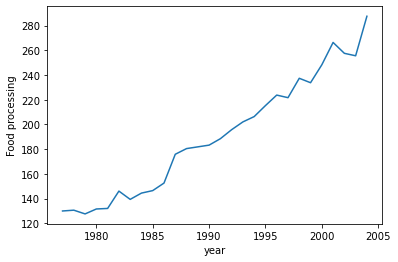

In [82]:
X=range(1977,2005)
plt.plot(X,Electricty["Food processing"])
plt.xlabel("year")
plt.ylabel("Food processing")

In [ ]:
#example of multipule linear lineargression
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#The first part shows the output generated by sklearn


In [ ]:
# prediction with sklearn
# The second part displays the predicted output using sklearn:

In [ ]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 